In [13]:
# Imports das bibliotecas/classes necessarias
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [14]:
# Carregando os dados do dataset CIFAR10
cifar10 = tf.keras.datasets.cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train/255.0, X_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

In [15]:
# Numero de classes do modelo
K = len(set(y_train))
print(f'Number of classes {K}')

Number of classes 10


In [19]:
# Layers convolucionais da rede
i = Input(shape=X_train[0].shape)
# x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3,3), strides=2, activation='relu')(x)

x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)


x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)


x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)


x = Flatten()(x)
# Layers densas da rede
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu',)(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax',)(x)

model = Model(i, x)

In [20]:
# Compila o modelo com o otimizador adam,
# Função custo sparse categorical crossentropy
# E metrica de precisao
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
)

In [18]:
# Treina o modelo
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 11ms/step - accuracy: 0.4345 - loss: 1.8430 - val_accuracy: 0.6139 - val_loss: 1.1054
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.6662 - loss: 0.9572 - val_accuracy: 0.6826 - val_loss: 0.9271
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7239 - loss: 0.8007 - val_accuracy: 0.7048 - val_loss: 0.8733
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7605 - loss: 0.6955 - val_accuracy: 0.7826 - val_loss: 0.6596
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7941 - loss: 0.6001 - val_accuracy: 0.7548 - val_loss: 0.7216
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8135 - loss: 0.5358 - val_accuracy: 0.7991 - val_loss: 0.6099
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8368 - loss: 0.4712 - val_accuracy: 0.8051 - val_loss: 0.6033
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8544 - loss: 0.

In [23]:
batch_size = 32
# Parametros para aumentar os dados (shifts e espelhamento)
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1,     # Deslocamento horizontal de até 10%
    height_shift_range=0.1,    # Deslocamento vertical de até 10%

    horizontal_flip=True,      # Espelhamento horizontal
)

# Passa o dataset de treino para gerar as imagens
train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size
# dando fit no modelo (recompilei assim como no video)
# a função fit_generator foi descontinuada, podemos apenas dar um .fit
r = model.fit(train_generator, validation_data=(X_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 53s 29ms/step - accuracy: 0.3933 - loss: 1.9564 - val_accuracy: 0.5982 - val_loss: 1.1448
Epoch 2/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6562 - loss: 1.1514

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 840us/step - accuracy: 0.6562 - loss: 1.1514 - val_accuracy: 0.5954 - val_loss: 1.1603
Epoch 3/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.6064 - loss: 1.1271 - val_accuracy: 0.6923 - val_loss: 0.8804
Epoch 4/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 461us/step - accuracy: 0.7188 - loss: 1.1133 - val_accuracy: 0.6926 - val_loss: 0.8818
Epoch 5/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.6709 - loss: 0.9471 - val_accuracy: 0.6296 - val_loss: 1.2167
Epoch 6/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 479us/step - accuracy: 0.6250 - loss: 0.8981 - val_accuracy: 0.6296 - val_loss: 1.2099
Epoch 7/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.7117 - loss: 0.8471 - val_accuracy: 0.7220 - val_loss: 0.8299
Epoch 8/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 458us/step - accuracy: 0.8125 - loss: 0.5292 - val_accuracy: 0.7156 - val_loss: 0.8492
Epoch 9/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7376 - loss: 0.77

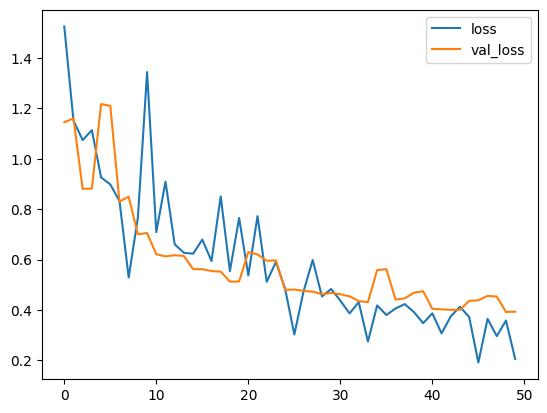

In [24]:
# Plots da função custo por iteração
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

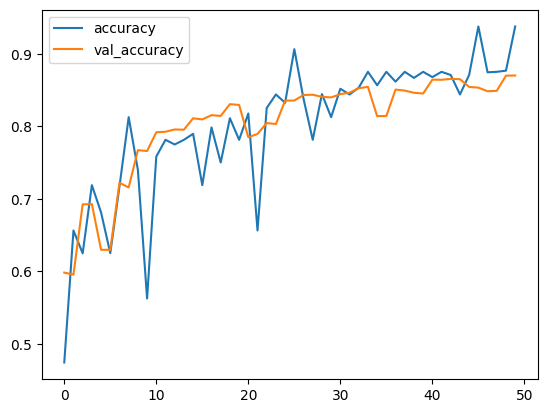

In [25]:
# Plots da precisão por iteração
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Confusion matrix, without normalization
[[895  16  33   7   6   2   9  10  12  10]
 [  3 951   0   0   1   0   2   0   3  40]
 [ 33   0 793  15  36  43  53  15   5   7]
 [  7   4  30 709  35 112  54  30   6  13]
 [  6   2  31  15 865  17  33  28   2   1]
 [  5   1  19  74  25 834  23  17   0   2]
 [  3   2  16  15   6  10 941   4   1   2]
 [  6   0  10  14  19  35   8 902   1   5]
 [ 56  26   4   3   0   2   3   4 879  23]
 [ 13  43   1   3   1   2   1   1   5 930]]


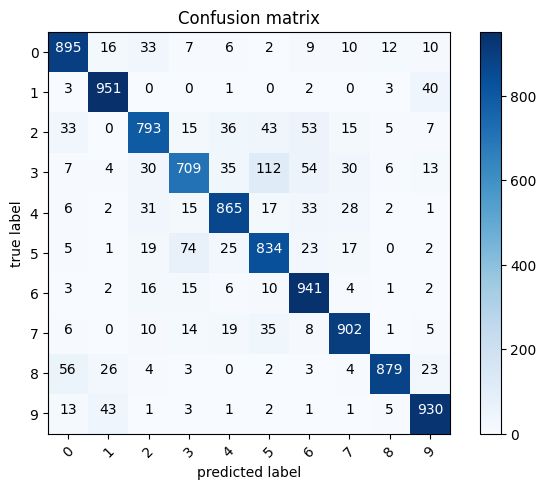

In [26]:
# Plot da matriz de confusão
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  # Verifica se a matriz será nromalizada
  if normalize:
    # Normaliza a matriz (caso necessario)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix, without normalization')



  # Printa a matriz crua
  print(cm)

  # Plot da matriz com matplotlib

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')

  plt.tight_layout()
  plt.ylabel('true label')
  plt.xlabel('predicted label')
  plt.show()


# Gera a matriz com os casos de teste e chama a função
p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [27]:
# Mapa de rótulos
labels = ''' airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Text(0.5, 1.0, 'True label: bird\n Predicted: cat')

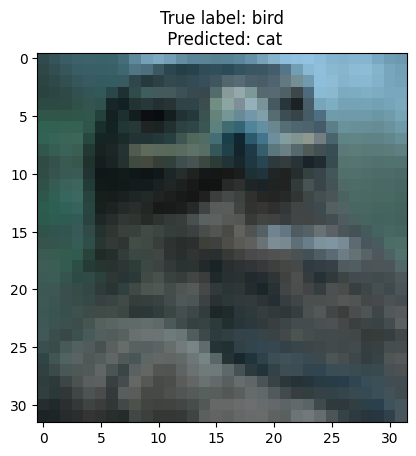

In [33]:
# Separa as predições erradas
missclassified_idx = np.where(p_test != y_test)[0]
# Escolhe uma de forma aleatoria
i = np.random.choice(missclassified_idx)
# Plota mostrando a predição e a classe correta
plt.imshow(X_test[i], cmap='gray')
plt.title(f'True label: {labels[y_test[i]]}\n Predicted: {labels[p_test[i]]}')